In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import random
import torch
import itertools
import pickle as pkl
import matplotlib.gridspec as gridspec
from time import time
from sklearn.manifold import TSNE
from math import sqrt, comb
from pyvis.network import Network 
from torch_geometric.datasets import Coauthor, TUDataset
from torch_geometric.utils import to_networkx
import osmnx as ox

from places import generate_places

from publib import set_style, fix_style
set_style('article')

my_font=30

## Visualize Cities

In [ ]:
places = ['Paris, France']
network_paris = ox.graph_from_place(places, network_type="all", retain_all=False)
places = ['Shanghai, China']
network_shanghai = ox.graph_from_place(places, network_type="all", retain_all=False)
places = ['Los Angeles, California, USA']
network_la = ox.graph_from_place(places, network_type="drive", retain_all=False)
places = ['London, England, UK', 'City of London, London, England, UK']
network_london = ox.graph_from_place(places, network_type="drive", retain_all=False)

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(24, 7), gridspec_kw={'width_ratios': [1, 1, 1, 1]})
my_font = 30

ox.plot_graph(network_paris, node_size=0, edge_linewidth=1, edge_color='black', edge_alpha=0.5,
              ax=ax[0], show=False)

ox.plot_graph(network_shanghai, node_size=0, edge_linewidth=1, edge_color='black', edge_alpha=0.5,
              ax=ax[1], show=False)

ox.plot_graph(network_la, node_size=0, edge_linewidth=1, edge_color='black', edge_alpha=0.5,
              ax=ax[2], show=False)

ox.plot_graph(network_london, node_size=0, edge_linewidth=1, edge_color='black', edge_alpha=0.5,
              ax=ax[3], show=False)

ax[0].set_title(f"Paris", fontsize=my_font)
ax[1].set_title(f"Shanghai", fontsize=my_font)
ax[2].set_title(f"Los Angeles", fontsize=my_font)
ax[3].set_title(f"London", fontsize=my_font)

fig.align_titles()

fix_style('article')
plt.savefig(f'./road_networks_visualizations_cities.jpg', bbox_inches='tight')

plt.show()


## Visualize Regions

%%%%%% creating road network for uk ... %%%%%%


/nfs/home/huidongl/anaconda3/lib/python3.11/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 331 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


finished at 2683.18s!
%%%%%% creating road network for europe_west ... %%%%%%


/nfs/home/huidongl/anaconda3/lib/python3.11/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 2,092 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


finished at 37254.30s!
%%%%%% creating road network for usa_main ... %%%%%%


/nfs/home/huidongl/anaconda3/lib/python3.11/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 4,511 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


finished at 69960.90s!


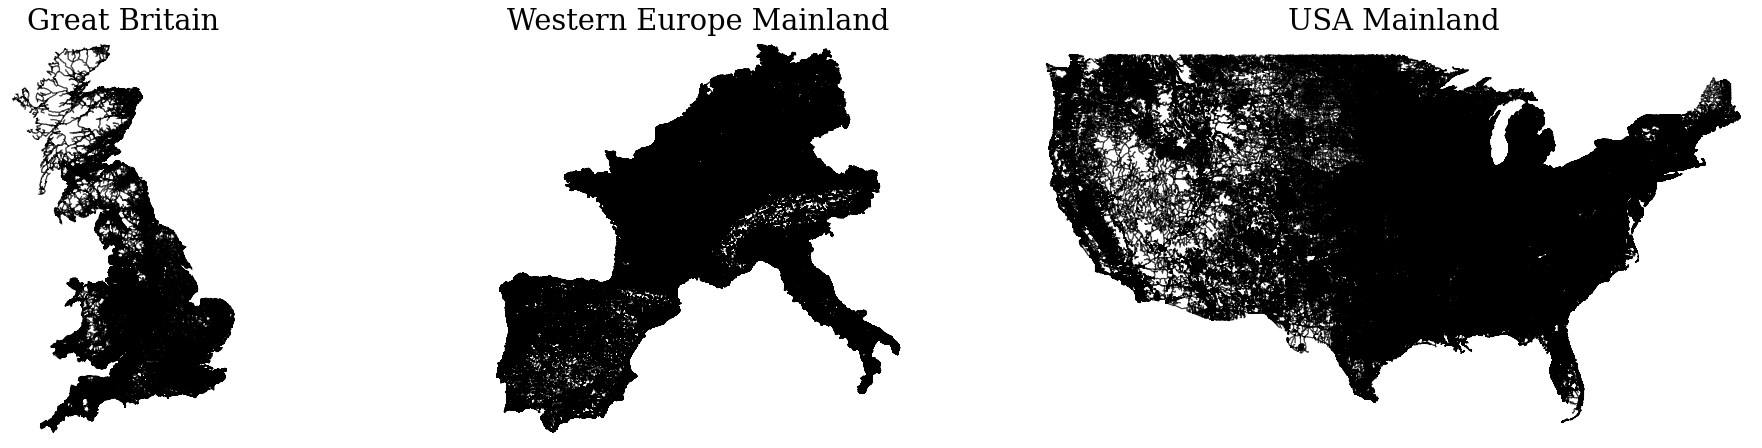

In [4]:
fig, ax = plt.subplots(1,3, figsize=(24, 6), gridspec_kw={'width_ratios': [1, 1.5, 1.5]})
my_font = 26


place_name = 'uk'
start_time = time()
print(f"%%%%%% creating road network for {place_name} ... %%%%%%")
data_dir, places = generate_places(place_name)
network_uk = ox.graph_from_place(places, network_type="drive", retain_all=False)
ox.plot_graph(network_uk, node_size=0, edge_linewidth=1, edge_color='black', edge_alpha=0.5,
              ax=ax[0], show=False)
print(f'finished at {(time() - start_time):.2f}s!')
del network_uk


place_name = 'europe_west'
print(f"%%%%%% creating road network for {place_name} ... %%%%%%")
data_dir, places = generate_places(place_name)
network_eu = ox.graph_from_place(places, network_type="drive", retain_all=False)
ox.plot_graph(network_eu, node_size=0, edge_linewidth=1, edge_color='black', edge_alpha=0.5,
              ax=ax[1], show=False)
print(f'finished at {(time() - start_time):.2f}s!')
del network_eu


place_name = 'usa_main'
print(f"%%%%%% creating road network for {place_name} ... %%%%%%")
data_dir, places = generate_places(place_name)
network_us = ox.graph_from_place(places, network_type="drive", retain_all=False)
ox.plot_graph(network_us, node_size=0, edge_linewidth=1, edge_color='black', edge_alpha=0.5,
              ax=ax[2], show=False)
print(f'finished at {(time() - start_time):.2f}s!')
del network_us


ax[0].set_title(f"Great Britain", fontsize=my_font)
ax[1].set_title(f"Western Europe Mainland", fontsize=my_font)
ax[2].set_title(f"USA Mainland", fontsize=my_font)


fig.align_titles()

fix_style('article')
plt.savefig(f'./road_networks_visualizations_regions.jpg', bbox_inches='tight')

plt.show()